In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pickle

# Importing Data

In [15]:
crop = pd.read_csv("Crop_recommendation.csv")
print(crop.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


# Asq Six Question to yourself

In [16]:
print(f"Shape of dataset: {crop.shape}")
print(crop.info())

Shape of dataset: (2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [17]:
print("Missing values per column:")
print(crop.isnull().sum())

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [18]:
print(f"Number of duplicate rows: {crop.duplicated().sum()}")
print(crop.describe())

Number of duplicate rows: 0
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  

# Exploring Data

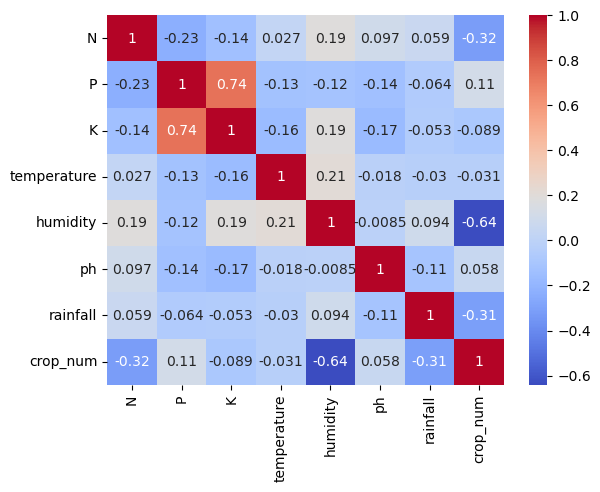

In [31]:
numeric_cols = crop.select_dtypes(include=[np.number]).columns
corr = crop[numeric_cols].corr()
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
plt.show()


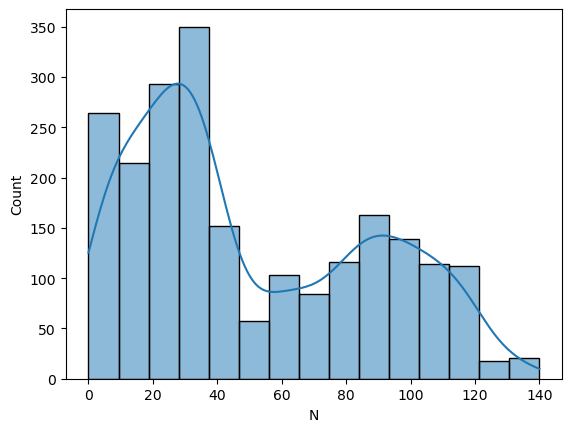

In [30]:
sns.histplot(crop['N'], kde=True)
plt.show()


# Encoding

In [20]:
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7, 'apple': 8,
    'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14,
    'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20,
    'chickpea': 21, 'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)
print(crop['crop_num'].value_counts())

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64


# Prepare data for training

In [21]:
X = crop.drop(['crop_num', 'label'], axis=1)
y = crop['crop_num']

# Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1760, 7)
Testing data shape: (440, 7)



# Scale the features using MinMaxScaler

In [23]:
ms = MinMaxScaler()
sc = StandardScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Standarization

In [ ]:
c

# Training Models

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.4f}")



Logistic Regression accuracy: 0.9636
Naive Bayes accuracy: 0.9955
Support Vector Machine accuracy: 0.9682
K-Nearest Neighbors accuracy: 0.9591
Decision Tree accuracy: 0.9864
Extra Trees accuracy: 0.9409
Random Forest accuracy: 0.9932
Bagging accuracy: 0.9909


c:\Users\tejas\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost accuracy: 0.0955
Gradient Boosting accuracy: 0.9818


# Train and Save the Random Forest Model

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f"Random Forest accuracy: {accuracy_score(y_test, y_pred):.4f}")

Random Forest accuracy: 0.9932


# Predictive System

In [26]:
def recommendation(N, P, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, k, temperature, humidity, ph, rainfall]])
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)
    prediction = rfc.predict(transformed_features)
    return prediction[0]

In [27]:
N, P, k, temperature, humidity, ph, rainfall = 40, 50, 50, 40.0, 20, 100, 100
predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)


c:\Users\tejas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



# Map prediction to crop name

In [28]:

crop_dict_rev = {v: k for k, v in crop_dict.items()}
crop_name = crop_dict_rev.get(predict, "Unknown crop")
print(f"Recommended crop: {crop_name}")

Recommended crop: chickpea


# Save the models and scalers

In [29]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)
with open('minmaxscaler.pkl', 'wb') as f:
    pickle.dump(ms, f)
with open('standscaler.pkl', 'wb') as f:
    pickle.dump(sc, f)